# Extract Labels for classification - Products and Images

## Importing and cleansing the data

In [1]:
## Import required libraries and set plotly theme
import numpy as np
import pandas as pd
import plotly
import missingno as msno
import os
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7156 non-null   object 
 1   product_name         7156 non-null   object 
 2   category             7156 non-null   object 
 3   product_description  7156 non-null   object 
 4   price                7156 non-null   float64
 5   location             7156 non-null   object 
dtypes: float64(1), object(5)
memory usage: 335.6+ KB


/Users/rupertcoghlan/miniforge3/envs/rmc_base_py_39/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/rupertcoghlan/miniforge3/envs/rmc_base_py_39/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


array(['Home & Garden', 'Baby & Kids Stuff', 'DIY Tools & Materials',
       'Music, Films, Books & Games', 'Phones, Mobile Phones & Telecoms',
       'Clothes, Footwear & Accessories', 'Other Goods',
       'Health & Beauty', 'Sports, Leisure & Travel', 'Appliances',
       'Computers & Software', 'Office Furniture & Equipment',
       'Video Games & Consoles'], dtype=object)

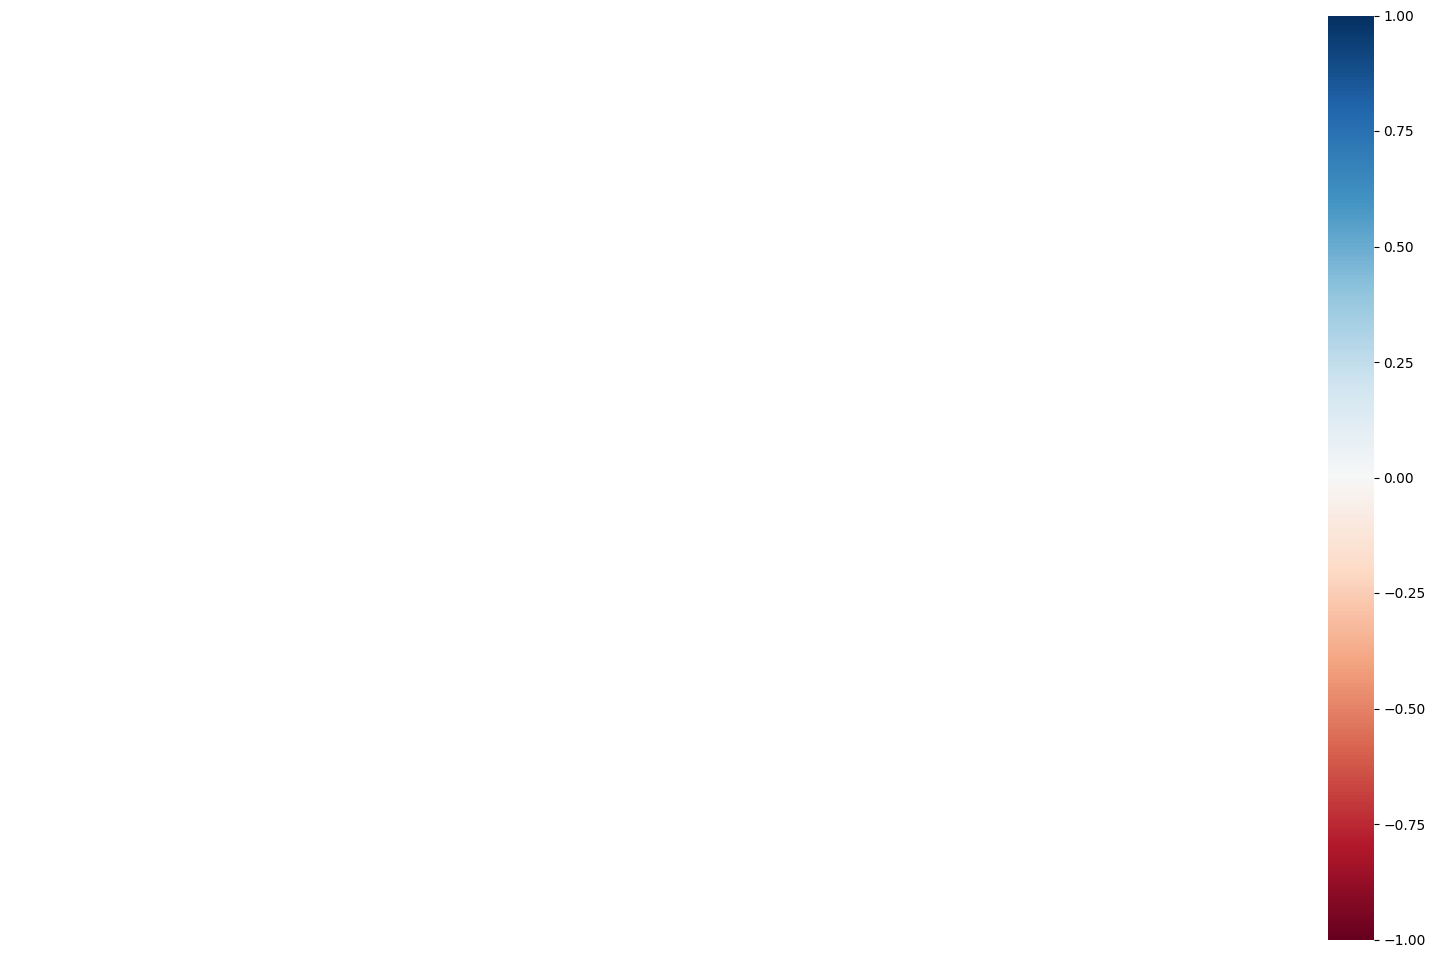

In [2]:
######## CLEAN THE IMAGES AND CSV FILES TO DATAFRAMES
## import Images CSV files
images_df = pd.read_csv('Images.csv')
images_df = images_df.drop(columns='Unnamed: 0', axis=1)
# %%
## Preview the dataframe
images_df.head()
# %%
## Check for the number of null values
images_df.isnull().sum()
# %%
## Import Product CSV Files
products_df = pd.read_csv('Products.csv', lineterminator='\n')
products_df = products_df.drop(columns='Unnamed: 0', axis=1)
# %%
## Preview and check for null values
products_df.head()
products_df.isna().sum()
# %%

msno.heatmap(products_df)
# %%
### Clean products price column
price_regex_pattern = {'£': "",
                       ',': ""}

products_df['price'] = products_df['price'].replace(price_regex_pattern, regex=True)

# %%
## Instanstiate the price column as a float
products_df['price'] = products_df['price'].astype(float)
# %%
products_df.info()
# %%
products_df.head()
# %%
## Split the categories using the / terminator and take the first category as main_category
products_df['main_category'] = products_df['category'].str.split(' /', expand=True)[0]
# %%
## CHeck that the categories are unique
products_df['main_category'].unique()

In [3]:
products_df['category'].str.split(' /').str.get(0).unique()

array(['Home & Garden', 'Baby & Kids Stuff', 'DIY Tools & Materials',
       'Music, Films, Books & Games', 'Phones, Mobile Phones & Telecoms',
       'Clothes, Footwear & Accessories', 'Other Goods',
       'Health & Beauty', 'Sports, Leisure & Travel', 'Appliances',
       'Computers & Software', 'Office Furniture & Equipment',
       'Video Games & Consoles'], dtype=object)

In [4]:
## Main category check
products_df.head()

,id,product_name,category,product_description,price,location,main_category
0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",5.0,"Wokingham, Berkshire",Home & Garden
1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,20.0,"Inverness, Highland",Home & Garden
2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,20.0,"Skegness, Lincolnshire",Home & Garden
3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,115.0,"Radstock, Somerset",Home & Garden
4,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",New Design Shannon Corner sofa 5 Seater Avail...,450.0,"Delph, Manchester",Home & Garden


In [5]:
######## Extracting Labels for Classification
products_df['main_category_code'] = products_df['main_category'].astype('category').cat.codes

In [6]:
## Creating category decoder
unique_cat_codes = list(products_df['main_category'].astype('category').cat.codes.unique())
unique_cats = list(products_df['main_category'].unique())
cat_decoder = {}
for i in range(len(unique_cat_codes)):
    cat_decoder[unique_cat_codes[i]] = unique_cats[i]




In [7]:
cat_decoder.keys()

dict_keys([6, 1, 4, 7, 10, 2, 9, 5, 11, 0, 3, 8, 12])

In [8]:
products_df[['main_category', 'main_category_code']].value_counts()

main_category                     main_category_code
Home & Garden                     6                     834
Office Furniture & Equipment      8                     647
Computers & Software              3                     619
Music, Films, Books & Games       7                     618
Health & Beauty                   5                     613
DIY Tools & Materials             4                     543
Other Goods                       9                     531
Appliances                        0                     521
Video Games & Consoles            12                    515
Sports, Leisure & Travel          11                    465
Phones, Mobile Phones & Telecoms  10                    440
Clothes, Footwear & Accessories   2                     413
Baby & Kids Stuff                 1                     397
dtype: int64

In [9]:
images_df.head()

,id,product_id
0,912bb259-3ad9-457b-9db1-ce1da9016057,5f5f57d7-778f-4336-bb10-b43863418c8c
1,b166d305-b852-4bdd-83f4-465b20da94fa,5f5f57d7-778f-4336-bb10-b43863418c8c
2,68f5a29d-0075-4d60-81c1-ab684a82e50c,c2c8949f-3cde-4651-a234-4a4a1b2a9ad4
3,f6a309d7-d247-446a-9b5e-aceefdd4334d,c2c8949f-3cde-4651-a234-4a4a1b2a9ad4
4,2c2b3a6f-15b3-4289-937a-15482d9f5781,8292aa4e-7f1b-4655-bf0e-f1f2c9e3ffaf


In [10]:
training_data = pd.merge(left=images_df, right=products_df, left_on='product_id', right_on='id', how='left')

In [11]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12604 entries, 0 to 12603
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_x                 12604 non-null  object 
 1   product_id           12604 non-null  object 
 2   id_y                 12604 non-null  object 
 3   product_name         12604 non-null  object 
 4   category             12604 non-null  object 
 5   product_description  12604 non-null  object 
 6   price                12604 non-null  float64
 7   location             12604 non-null  object 
 8   main_category        12604 non-null  object 
 9   main_category_code   12604 non-null  int8   
dtypes: float64(1), int8(1), object(8)
memory usage: 997.0+ KB


In [12]:
training_data = training_data[['id_x', 'product_id', 'main_category_code']]

In [13]:
training_data = training_data.rename(columns={"id_x": "id", "main_category_code": "labels"})

In [14]:
training_data

,id,product_id,labels
0,912bb259-3ad9-457b-9db1-ce1da9016057,5f5f57d7-778f-4336-bb10-b43863418c8c,6
1,b166d305-b852-4bdd-83f4-465b20da94fa,5f5f57d7-778f-4336-bb10-b43863418c8c,6
2,68f5a29d-0075-4d60-81c1-ab684a82e50c,c2c8949f-3cde-4651-a234-4a4a1b2a9ad4,6
3,f6a309d7-d247-446a-9b5e-aceefdd4334d,c2c8949f-3cde-4651-a234-4a4a1b2a9ad4,6
4,2c2b3a6f-15b3-4289-937a-15482d9f5781,8292aa4e-7f1b-4655-bf0e-f1f2c9e3ffaf,6
...,...,...,...
12599,cdec1c5c-c4b1-42db-afbe-3fa68ea4b87d,2b0a652b-46a2-4297-b619-5efeeb222787,12
12600,dc99e40f-6b15-494d-9fb7-f0d02e9781f9,719fd40a-870e-4144-b324-55dff2e66fb4,12
12601,c8488028-bf07-4258-a4c2-56d2fe387835,719fd40a-870e-4144-b324-55dff2e66fb4,12
12602,c6113145-89c8-47cd-9211-38f29d016cc7,86d1806b-5575-4a7e-9160-f24f12be6c95,12


In [15]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12604 entries, 0 to 12603
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12604 non-null  object
 1   product_id  12604 non-null  object
 2   labels      12604 non-null  int8  
dtypes: int8(1), object(2)
memory usage: 307.7+ KB


In [16]:
training_data.to_csv('training_data.csv')